Load the dataset

In [1]:
import pandas as pd
import random
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Colab mount/Creditcard_data.csv')
#df.head()

Repose and Target variable

In [2]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

Check the number of 1's and 0's

In [3]:
count = df['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 9
Not Fraudulent "0": 763
1.1795543905635648


Plot the no of 1's and 0's

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


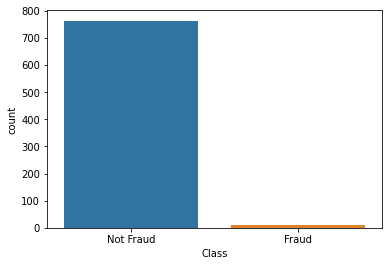

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
g = sns.countplot(df['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

**Resampling Techniques** (oversampling the minority class)

1) Random Over Sampling


In [5]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


In [6]:
x_ros['Class']=y_ros
# x_ros.head()

2) Synthetic minority over-sampling technique

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


**Sampling**

1) Random Sampling

In [8]:
Z=1.96
p=0.5
E=0.10
n1=round((Z*Z*p*(1-p))/(E*E))
# print(n1)
sample_1 = x_ros.sample(n=n1, random_state=0)
# sample_1

2) Stratified Sampling

In [9]:
Z=1.96
p=0.5
E=0.10
S=2
n2=round((Z*Z*p*(1-p))/(E/S)**2)
# print(n2)

# Disproportionate sampling:
# randomly select n2/2 samples from each stratum
n2=int(n2/2)
sample_2=x_ros.groupby('Class', group_keys=False).apply(lambda x: x.sample(n2))
# sample_2

3) Systematic Sampling

In [10]:
size_systematic_sample = n1
number=len(x_ros)
# Interval (Gap) taken
interval = round(number // size_systematic_sample)
 
# Choosing Random Starting Point
random_number = random.randint(1, interval)
 
# Define systematic sampling function
def systematic_sampling(df, step):
 
    indexes = np.arange(random_number, len(df)-1, step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
 
 
# Obtain a systematic sample and save it in a new variable
sample_3 = systematic_sampling(x_ros, interval)
# sample_3

4) Cluster Sampling

In [11]:
Z=1.96
p=0.5
E=0.10
C=2
n4=round((Z*Z*p*(1-p))/(E/C)**2)
df = x_ros
n_per_cluster = 192
num_select_clusters = C

N = len(df)
K = int(N/n_per_cluster)
data = None
for k in range(K):
    sample_k = df.sample(n_per_cluster)
    sample_k["cluster"] = np.repeat(k,len(sample_k))
    df = df.drop(index = sample_k.index)
    data = pd.concat([data,sample_k],axis = 0)

random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
sample_4 = data[data.cluster.isin(random_chosen_clusters)]

sample_4=sample_4.iloc[:, :-1]
# sample_4

5) Convenience Sampling

In [12]:
sorted_x_ros = x_ros.sort_values(['Amount', 'Time'],ascending = [True, True])
sample_size = 100
sample = sorted_x_ros.iloc[:,25:sample_size]
sample_5=sample.iloc[:,1:]

**Model Evaluation**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [14]:
sample=[sample_1,sample_2,sample_3,sample_4,sample_5]
# sample[i]

In [15]:
models = {}
# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [16]:
df_model = pd.DataFrame(index=models.keys())
#iterating over all samples
for i in range(0,5):
  
  #Split the dataset into training and testing sets
  X= sample[i].iloc[:, :-1]
  y = sample[i].iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=0)

  #Normalize the data for numerical stability
  ss_train = StandardScaler()
  X_train = ss_train.fit_transform(X_train)
  ss_test = StandardScaler()
  X_test = ss_test.fit_transform(X_test)

  #Performance evaluation of each binary classifier
  accuracy = {}
  for key in models.keys():
      
      # Fit the classifier
      models[key].fit(X_train, y_train)
      
      # Make predictions
      predictions = models[key].predict(X_test)
      
      # Calculate metrics
      accuracy[key] = accuracy_score(predictions, y_test)

  df_model['Sample '+str(i+1)] = accuracy.values()

df_model

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5
Logistic Regression,0.896552,0.844828,0.741935,0.931034,0.676856
Support Vector Machines,0.862069,0.577586,0.806452,0.948276,0.683406
Decision Trees,0.620690,0.534483,0.838710,0.681034,0.495633
Random Forest,0.896552,0.612069,0.967742,0.844828,0.497817
Naive Bayes,0.241379,0.818966,0.483871,0.758621,0.517467
K-Nearest Neighbor,0.689655,0.956897,0.774194,0.939655,0.903930


**Conclusion**

<ipython-input-17-f8946d5f4198>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


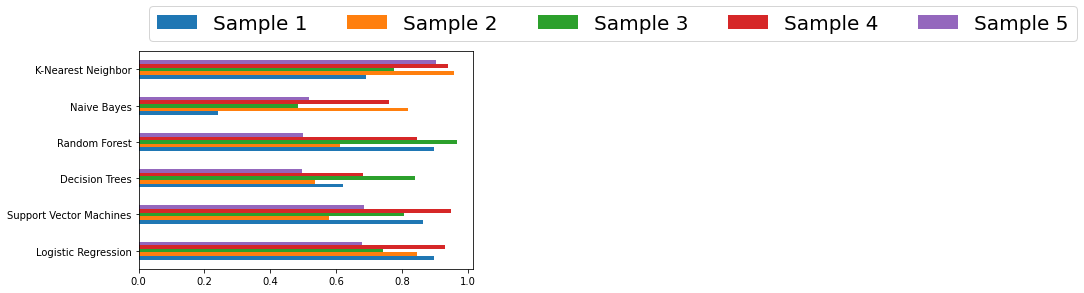

In [17]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 20}
)
plt.tight_layout()